# Polynomial Regression Implementation


## 1. Considerations
*__Polynomial Regression__ is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial.*<br>

*Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.*

$$
    \text{linear} \: ax+b=0
$$
$$
    \text{quadratic} \: ax^2+bx+c=0
$$
$$
    \text{cubic} \: ax^3+bx^2+cx+d=0
$$

__Advantages of Polynomial Regression__
- Polynomial Regression does not require the relationship between the independent and dependent variables to be linear in the data set,This is also one of the main difference between the Linear and Polynomial Regression.
- Polynomial Regression is generally used when the points in the data are not captured by the Linear Regression Model and the Linear Regression fails in describing the best result clearly.

#### 1.1 Analytical Solution


#### 1.2 Choses mathématiques
$$\forall x \in \mathbb{R}$$
$$y = ax^2+bx+c$$
$$Err = \sum_{i=1}^{n}(y - (ax^2+bx+c))^2$$
$$Err = \sum_{i=1}^{n}(y - ax^2-bx-c)^2$$
$$ = \sum_{i=1}^{n}(y - ax^2-bx-c)^2$$

<br>
<br>
<br>

$$\frac{\partial Err}{\partial a} = \sum_{i=1}^{n}-2x^2(y-ax^2-bx-c)$$
$$0 = -2\sum x^2y + 2a\sum x^4+ 2b\sum x^3 + 2c\sum x^2$$ 
$$0 = -\sum x^2y + a\sum x^4+ b\sum x^3 + c\sum x^2$$ 

<br>
<br>
<br>

$$\frac{\partial Err}{\partial b} = \sum_{i=1}^{n}-2x(y-ax^2-bx-c)$$
$$0 = -2\sum xy + 2a\sum x^3+ 2b\sum x^2 + 2c\sum x$$
$$0 = -\sum xy + a\sum x^3+ b\sum x^2 + c\sum x$$
<br>
<br>
<br>

$$\frac{\partial Err}{\partial c} = \sum_{i=1}^{n}-2(y-ax^2-bx-c)$$
$$0 = -2\sum y + 2a\sum x^2+ 2b\sum x + 2cn$$
$$0 = -\sum y + a\sum x^2+ b\sum x + cn$$

<br>

<br>

<br>


$$
\text{Matrix Form}\\
\begin{bmatrix}
\sum x^4 & \sum x^3 & \sum x^2 \\
\sum x^3 & \sum x^2 & \sum x \\
\sum x^2 & \sum x & n \\
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
=
\begin{bmatrix}
\sum x^2y \\
\sum xy \\
\sum y\\
\end{bmatrix}
$$

<br>

<br>

<br>


$$
\text{Matrix Form}\\
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
=
\begin{bmatrix}
\sum x^2y \\
\sum xy \\
\sum y\\
\end{bmatrix}
\begin{bmatrix}
\sum x^4 & \sum x^3 & \sum x^2 \\
\sum x^3 & \sum x^2 & \sum x \\
\sum x^2 & \sum x & n \\
\end{bmatrix}^{-1}
$$
<br>



#### 1.3 NumPy Implementation 

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
data = pd.read_csv("./tvmarketing.csv")
x = data["TV"].values
y = data["Sales"].values



1. **Slope**:
   
   $$ \alpha = \frac{n\sum_{i=1}^{n} X_i Y_i - \sum_{i=1}^{n}X_i \sum_{i=1}^{n}Y_i}{n\sum_{i=1}^{n}X_i^2 - (\sum_{i=1}^{n}X_i)^2}$$

   

2. **Intercept**:
   
   $$ \beta = \bar{y} - \alpha\bar{x} $$




In [147]:
def unvariate_linear_regression(x,y):
    n = x.shape[0]

    x_y_sum = (x*y).sum()
    x_sum = x.sum()
    y_sum = y.sum()

    x_x_sum = np.square(x).sum()
    x_sum_2 = np.square(x.sum())

    alpha = (n*x_y_sum - x_sum*y_sum)/(n*x_x_sum - x_sum_2)
    beta = y.sum()/n - alpha*(x.sum()/n)
    
    slope = alpha
    intercept = beta

    
    return (slope, intercept)

def unvariate_linear_regression_predict(x, slope, intercept):
    predicted = x*slope + intercept
    return predicted
    

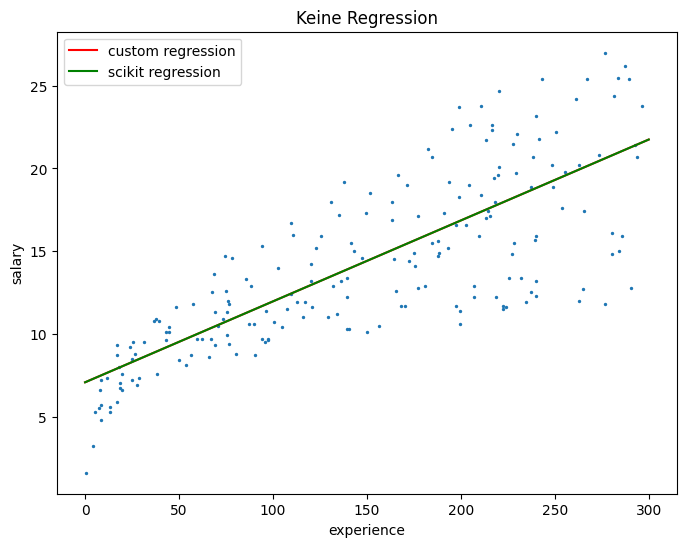

In [151]:
x_train = x[:int(len(x)*0.8)]
x_test = x[int(len(x)*0.8):]
y_train = y[:int(len(x)*0.8)]
y_test = y[int(len(x)*0.8):]

# Calculate slope and intercept using custom regression
slope_custom, intercept_custom = unvariate_linear_regression(x_train,y_train)
# Calculate slope and intercept using sklearn regression
reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)

# Adjust the figure size
plt.figure(figsize=(8, 6))  # Width x Height in inches

# Create a line plot
plt.scatter(x, y, s=2)

# Generate 200 points from 0 to 60
_x = np.linspace(0, 300, 1000)  

# Plot custom regression
plt.plot(_x, unvariate_linear_regression_predict(_x, slope_custom, intercept_custom), color='red', label='custom regression')
# Plot sklearn regression
plt.plot(_x, reg.predict(_x.reshape(-1, 1)), color='green', label='scikit regression')

# Add labels and a title
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('Keine Regression')
plt.legend()
# Show the plot
plt.show()

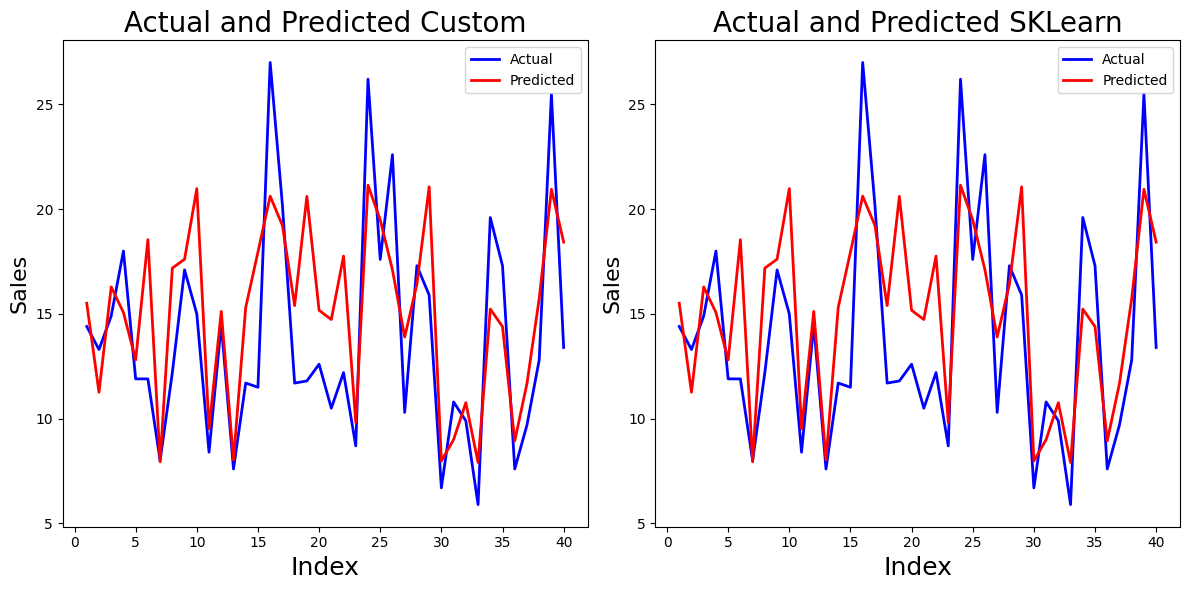

In [166]:
# Actual vs Predicted Custom
c = [i for i in range(1, y_test.shape[0] + 1, 1)]         
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid of subplots

# Subplot 1: Custom Regression
axes[0].plot(c, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
axes[0].plot(c, unvariate_linear_regression_predict(x_test, slope_custom, intercept_custom), color="red", linewidth=2, linestyle="-", label='Predicted')
axes[0].set_title('Actual and Predicted Custom', fontsize=20)
axes[0].set_xlabel('Index', fontsize=18)
axes[0].set_ylabel('Sales', fontsize=16)

# Actual vs Predicted SKLearn
# Assuming you want another plot next to the first one
# Subplot 2: SKLearn Regression
axes[1].plot(c, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
axes[1].plot(c, reg.predict(x_test.reshape(-1, 1)), color="red", linewidth=2, linestyle="-", label='Predicted')
axes[1].set_title('Actual and Predicted SKLearn', fontsize=20)
axes[1].set_xlabel('Index', fontsize=18)
axes[1].set_ylabel('Sales', fontsize=16)

# Add legends for both subplots
axes[0].legend()
axes[1].legend()

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


In [171]:
print(f"CUSTOM\nSlope:{slope_custom}\nIntercept:{intercept_custom}\n")
print(f"SKLEARN\nSlope:{reg.coef_[0]}\nIntercept:{reg.intercept_}\n\n")

mse = mean_squared_error(y_test, reg.predict(x_test.reshape(-1, 1)))
r_squared = r2_score(y_test, reg.predict(x_test.reshape(-1, 1)))
print('Mean_Squared_Error SKLearn:' ,mse)
print('r_square_value SKLearn:',r_squared)

mse = mean_squared_error(y_test, unvariate_linear_regression_predict(x_test, slope_custom, intercept_custom))
r_squared = r2_score(y_test, unvariate_linear_regression_predict(x_test, slope_custom, intercept_custom))
print('Mean_Squared_Error Custom:' ,mse)
print('r_square_value Custom:',r_squared)

CUSTOM
Slope:0.04893566041127533
Intercept:7.068777665906137

SKLEARN
Slope:0.04893566041127537
Intercept:7.068777665906133


Mean_Squared_Error SKLearn: 14.128761342728321
r_square_value SKLearn: 0.4709116772791946
Mean_Squared_Error Custom: 14.128761342728314
r_square_value Custom: 0.4709116772791949
